In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [3]:
import statsmodels.api as sm

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [5]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [6]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [7]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [8]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [9]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [10]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [4]:
def add_numbers(k, *numbers):
    print(k)
    return sum(numbers)

print(add_numbers(1, 2, 3))     # 6
print(add_numbers(5, 10, 15, 20))  # 50


1
5
5
45


In [5]:
print(add_numbers(2,3))

2
3


In [1]:
from scipy.stats import boxcox
import numpy as np

# Example data (must be positive)
y = np.array([10, 15, 20, 25, 30])

# Apply Box-Cox transformation and find optimal lambda
y_transformed, lambda_opt = boxcox(y)

print(f"Optimal λ: {lambda_opt}")


Optimal λ: 0.6998074345679719


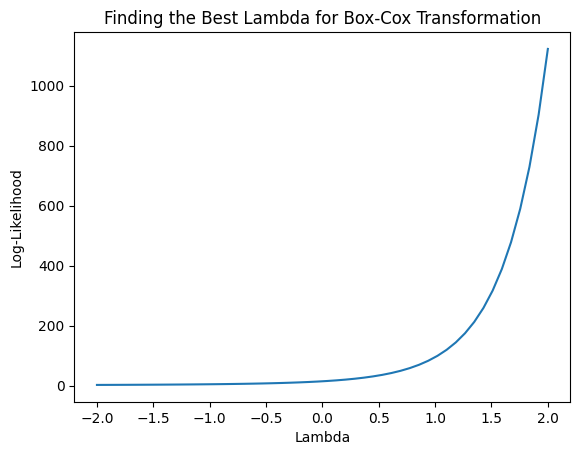

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

lambdas = np.linspace(-2, 2, 50)  # Range of lambda values
log_likelihoods = [boxcox(y, lmbda=lmbda).sum() for lmbda in lambdas]

plt.plot(lambdas, log_likelihoods)
plt.xlabel("Lambda")
plt.ylabel("Log-Likelihood")
plt.title("Finding the Best Lambda for Box-Cox Transformation")
plt.show()
